In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler 

In [56]:
df=pd.read_csv('Employee.csv')

In [57]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [61]:
for col in df.columns:
    unique_vals=df[col].unique()
    count_unique=len(unique_vals)
    print(f'{count_unique} Unique values of coloumn {col} are : \n {unique_vals}')

4 Unique values of coloumn Company are : 
 ['TCS' 'Infosys' 'CTS' nan]
30 Unique values of coloumn Age are : 
 [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
41 Unique values of coloumn Salary are : 
 [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
12 Unique values of coloumn Place are : 
 ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
1 Unique values of coloumn Country are : 
 ['India']
2 Unique values of coloumn Gender are : 
 [0 1]


In [65]:
df = df.rename(columns={'Age': 'Employee_age', 'Salary': 'Employee_salary'})

In [59]:
df['Company'] = df['Company'].replace({
    'Tata Consultancy Services': 'TCS',
    'Infosys Pvt Lmt': 'Infosys',
    'Congnizant': 'CTS'
})

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [62]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [66]:
df['Employee_age'] = df['Employee_age'].replace(0, np.nan)

In [67]:
df.isnull().sum()

Company             8
Employee_age       24
Employee_salary    24
Place              14
Country             0
Gender              0
dtype: int64

In [68]:
df.duplicated().sum()

4

In [69]:
df=df.drop_duplicates()

In [70]:
df = df.dropna(subset=['Company'])

In [71]:

df['Employee_age'] = df['Employee_age'].fillna(df['Employee_age'].mean())
df['Employee_salary'] = df['Employee_salary'].fillna(df['Employee_salary'].mean())
df['Place'] = df['Place'].fillna('Unknown')

In [72]:
df.isnull().sum()

Company            0
Employee_age       0
Employee_salary    0
Place              0
Country            0
Gender             0
dtype: int64

In [73]:
df.shape

(136, 6)

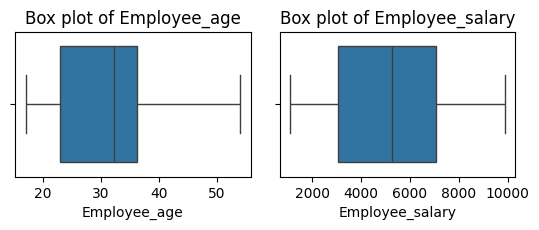

In [74]:
#Box plot to detect outliers

num_columns=df.select_dtypes(include=['float64']).columns

plt.figure(figsize=(8, 4))
for i, col in enumerate(num_columns, 1):
    plt.subplot(len(num_columns), 3, i)
    sns.boxplot(data=df, x=col)
    plt.title(f"Box plot of {col}")
    plt.xlabel(col)
    plt.tight_layout()

plt.show()

In [75]:
#Filter the data with age >40 and salary<5000
df1=df[(df['Employee_age']>40) & (df['Employee_salary']<5000)]
df1

,Company,Employee_age,Employee_salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


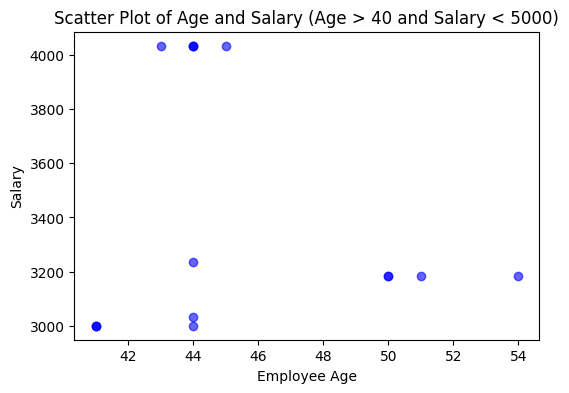

In [76]:
#Plot the chart with age and salary
plt.figure(figsize=(6, 4))
plt.scatter(df1['Employee_age'], df1['Employee_salary'], color='blue', alpha=0.6)
plt.title('Scatter Plot of Age and Salary (Age > 40 and Salary < 5000)')
plt.xlabel('Employee Age')
plt.ylabel('Salary')
plt.show()

In [77]:
#Count the number of people from each place and represent it visually

place_counts = df['Place'].value_counts()
place_counts

Place
Mumbai        33
Calcutta      30
Chennai       13
Delhi         13
Cochin        13
Unknown       13
Noida          7
Hyderabad      7
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

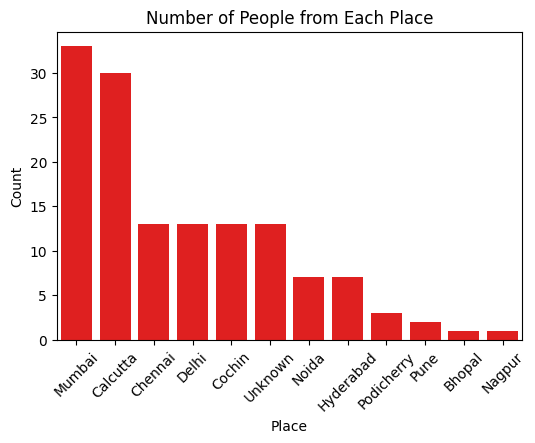

In [78]:
# Bar plot for the count of people from each place
plt.figure(figsize=(6, 4))
sns.barplot(x=place_counts.index, y=place_counts.values, color='red')
plt.title('Number of People from Each Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [79]:
#Label Encoder For Company
LE=LabelEncoder()
df['Company_encoded'] = LE.fit_transform(df['Company'])

In [81]:
df.head(10)

,Company,Employee_age,Employee_salary,Place,Country,Gender,Company_encoded
0,TCS,20.000000,5244.974138,Chennai,India,0,2
1,Infosys,30.000000,5244.974138,Mumbai,India,0,1
2,TCS,35.000000,2300.000000,Calcutta,India,0,2
3,Infosys,40.000000,3000.000000,Delhi,India,0,1
4,TCS,23.000000,4000.000000,Mumbai,India,0,2
5,Infosys,32.286957,5000.000000,Calcutta,India,0,1
6,TCS,32.286957,6000.000000,Chennai,India,1,2
7,Infosys,23.000000,7000.000000,Mumbai,India,1,1
8,TCS,34.000000,8000.000000,Calcutta,India,1,2
9,CTS,45.000000,9000.000000,Delhi,India,0,0


In [82]:
# One-Hot Encoding for 'Place' and 'Country'
df = pd.get_dummies(df, columns=['Place', 'Country'])

# Check the result
print(df.head())

   Company  Employee_age  Employee_salary  Gender  Company_encoded  \
0      TCS          20.0      5244.974138       0                2   
1  Infosys          30.0      5244.974138       0                1   
2      TCS          35.0      2300.000000       0                2   
3  Infosys          40.0      3000.000000       0                1   
4      TCS          23.0      4000.000000       0                2   

   Place_Bhopal  Place_Calcutta  Place_Chennai  Place_Cochin  Place_Delhi  \
0         False           False           True         False        False   
1         False           False          False         False        False   
2         False            True          False         False        False   
3         False           False          False         False         True   
4         False           False          False         False        False   

   Place_Hyderabad  Place_Mumbai  Place_Nagpur  Place_Noida  Place_Podicherry  \
0            False         False   

In [87]:
#After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.
#MinMaxScaler for age

minmax=MinMaxScaler()
df['Employee_age_minmax']=minmax.fit_transform(df[['Employee_age']])
#StandarScaler for Salary
stdscaler=StandardScaler()
df['Employee_salary_std']=stdscaler.fit_transform(df[['Employee_salary']])
df.head()

,Company,Employee_age,Employee_salary,Gender,Company_encoded,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Place_Unknown,Country_India,Employee_age_minmax,Employee_salary_std
0,TCS,20.0,5244.974138,0,2,False,False,True,False,False,False,False,False,False,False,False,False,True,0.081081,-3.834779e-16
1,Infosys,30.0,5244.974138,0,1,False,False,False,False,False,False,True,False,False,False,False,False,True,0.351351,-3.834779e-16
2,TCS,35.0,2300.000000,0,2,False,True,False,False,False,False,False,False,False,False,False,False,True,0.486486,-1.241714e+00
3,Infosys,40.0,3000.000000,0,1,False,False,False,False,True,False,False,False,False,False,False,False,True,0.621622,-9.465673e-01
4,TCS,23.0,4000.000000,0,2,False,False,False,False,False,False,True,False,False,False,False,False,True,0.162162,-5.249289e-01
